In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torch

In [18]:
def gaussian_kernel(window_size, sigma):
    x = torch.arange(window_size) - window_size // 2
    kernel = torch.exp(-0.5 * (x / sigma) ** 2)
    kernel /= kernel.sum()
    return kernel  # shape: (window_size,)

def smooth_torch_gaussian(data, smoothing_level=1):
    # data shape: (B, C, L)
    B, C, L = data.shape
    window_size = 2 * smoothing_level + 1
    sigma = smoothing_level

    base_kernel = gaussian_kernel(window_size, sigma)  # (window_size,)
    kernel = base_kernel.view(1, 1, -1).repeat(C, 1, 1)  # (C, 1, window_size)

    padding = window_size // 2
    smoothed = F.conv1d(data, kernel, padding=padding, groups=C)
    return smoothed  # shape: (B, C, L)

In [19]:
noisy_data = torch.randn((1, 187, 300))

In [30]:
smooth_1 = smooth_torch_gaussian(noisy_data, 1)
smooth_3 = smooth_torch_gaussian(noisy_data, 3)
smooth_5 = smooth_torch_gaussian(noisy_data, 5)

In [32]:
smooth_1.shape, smooth_3.shape, smooth_5.shape

(torch.Size([1, 187, 300]),
 torch.Size([1, 187, 300]),
 torch.Size([1, 187, 300]))

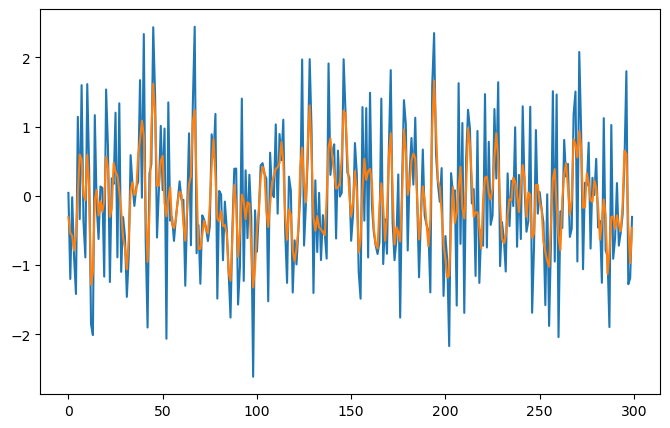

In [34]:
plt.figure(figsize=(8, 5))
plt.plot(noisy_data[0][10])
plt.plot(smooth_1[0][10])
plt.show()

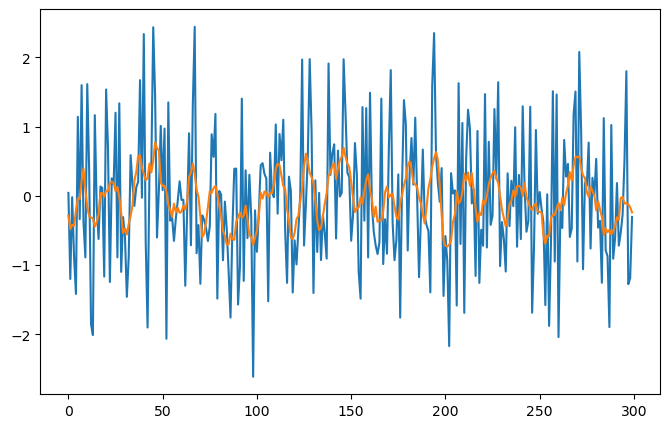

In [35]:
plt.figure(figsize=(8, 5))
plt.plot(noisy_data[0][10])
plt.plot(smooth_3[0][10])
plt.show()

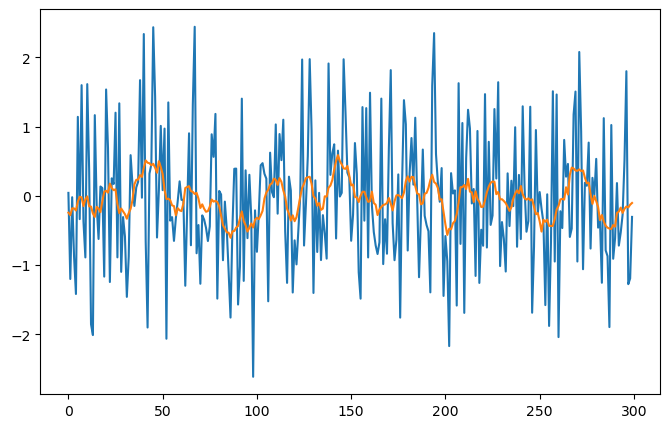

In [36]:
plt.figure(figsize=(8, 5))
plt.plot(noisy_data[0][10])
plt.plot(smooth_5[0][10])
plt.show()